# Домашняя работа №2

In [292]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from math import sqrt

#https://python-scripts.com/random-data

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

генеральная совокупность - совокупность всех элементов относительно которых будет проводиться эксперимент или решаться определенная проблема

выборка - это множество объектов, которые мы определенным образом выбираем из генеральной совокупности для проведения исследования 

- Если размер выборки больше 200, то такая выборка является репрезентативной?

общее правило - чем больше размер выборки тем лучше, 
однако, свойство репрезентативности выборки относится к способности выборки наиболее точно отображать характеристики генаральной совокупности,
поэтому прежде всего, когда говорится о репрезентативности, стоит обращать внимание способ, которым эта выборка извлекалась из генеральной совокупности,

Например, студентка решила провести исследование о карьерных перспективах ее вуза.Для этого она решила связаться с выпускниками вуза и предложить заполнить им подготовленную анкету.
Она разослала всем своим знакомым выпускникам данные анкеты, а также разместила ссылку на анкету в группе вконтакте.
В результате, она получила некоторую совокупность ответов. Но признать эти данные репрезентативными мы не можем, так как в равной мере вся генеральная совокупность выпускников охвачена не была.
В исследовании будут участвовать ответы только тех выпускников, которые находятся только в хороших отошениях со студенткой, имеют активную позицию по отношению к жизни факультета (те, кто заполнял анкету по ссылке в группе вконтакте).
Поэтому полученные резальтаты исследования считать достоверными мы не можем.
Существуют различные способы повысить репрезентативность выборки. Большинство из них использует в основе рандомизированный отбор.



- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

#your answer here
Длина волос мужчин Франции (можно ограничить определенным возрастным диапазоном)
Длина волос среди футболистов всех команд ЧМ-2018
Длина волос мужчин Земли (можно ограничить определенным возрастным диапазоном)

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

Simple random sample - присвоим всем весам числовые значения и запустим программу, которая случайным образом выберет нужное количество чисел в данном диапазоне. Все равно останется вероятность получить не совсем репрезентативную выборку.(например, перекос в сторону количества веса детей определенного пола или определенного родддома)
Stratified sample - разделим на две группы вес мальчиков и вес девочек (можно сделать разделение по роддомам).Дальше рандомно выберем половину нужного количества из первой группы, а другую половину из второй.
Если считаем, что в среднем роддомы похожи между собой, можем разбить генеральную совокупность на кластеры - роддомы, затем рандомно выбрать некоторое количество роддомов и рассматривать всех детей в них.


## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


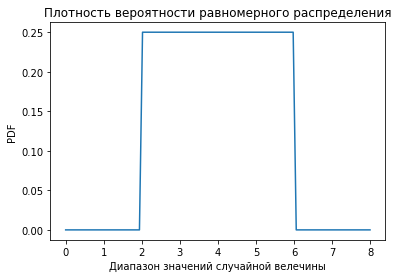

In [294]:
#your code here
#у равномерного распределения нельзя указать моду, так как все вероятности принимают одинаковое значение
a = 2
b = 6

uniform_rv = stats.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 8, 100)
pdf = uniform_rv.pdf(x)
plt.xlabel('Диапазон значений случайной велечины')
plt.ylabel('PDF')
plt.title('Плотность вероятности равномерного распределения')
plt.plot(x, pdf);

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

Связь распределений: 


http://www.math.wm.edu/~leemis/chart/UDR/UDR.html

Гамма распределение похоже на экспоненциальное тем, что им тоже моделируют время до наступления какого то события, однако, если в экспоненциальном моделируют время наступления до следующего события, гамма распределение моделирует время наступления до следующих n событий
Стоит отметить, что это распределение описывают параметры k(параметр формы, задает количество событий, для наступления которых мы моделируем время) и \\(  \Theta\\) - параметр масштаба, который характеризует интенсивность наступления события. Если k = 1, то есть моделируем время до наступления одного события, то гамма распределения становится экспоненциальным распределением.
В общем случае, Гамма распределение описывает время, необходимое для появления n событий, при условии, что они независимы и появляются с постоянной интенсивностью. Применяется, например, для описания наработки системы с резервированием отказов стареющих элементов.


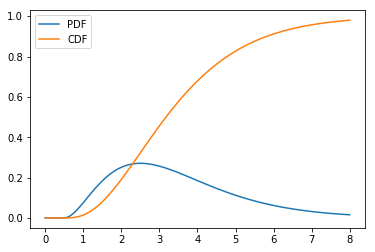

In [295]:
# stats gamma - первый параметр отвечает за форму, второй - за интенсивность (scale = 1/lambda), по умолчанию scale = 1
gamma_rv = stats.gamma(3, 1/2)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

X = np.linspace(1,5,100)
plt.plot(x, gamma_rv.pdf(x), label = 'PDF')
plt.plot(x, gamma_rv.cdf(x), label = 'CDF')
plt.legend(loc="upper left");

Пояснения к графику. На примере перегорания лампочек.

Пусть интенсивность перегорания лампочек - 2 лампочки в минуту. Мы будем рассматривать время, которое необходимо для того, чтобы перегорело три лампочки. График CDF показывает вероятность того, что три лампочки перегорят за время меньшее, чем x (F(x)  = P (X < x)).Мы можем видеть, что до 1 минуты значения функции CDF равны нулю, что логичено, так как в минуту у нас перегорает только две лампочки, а вот со второй минуты график начинает возрастать.
Посмотрим на график PDF.Он показывает, вероятность трем лампочкам проработать некоторое количество времени, до того как все три перегорят. Например, вероятность лампочек проработать 7-8 минут будет значительно меньше (площадь фигуры под графиков) , чем вероятность проработать от 2 до 3 минут.

In [296]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = np.median(sample)
mean = sample.mean()

#your code here
overshoot = np.append(sample,sample[-1]*10)
new_med = np.median(overshoot)
new_mean = overshoot.mean()

print('Sample median %0.4f, overshoot median %0.4f' % (med,new_med))
print('Sample mean %0.4f, overshoot mean %0.4f' % (mean,new_mean))

Sample median 3.6130, overshoot median 3.6605
Sample mean 3.7471, overshoot mean 4.7059


Можем видеть, что матожидание гораздо более неустойчиво к выбросам в данных.

- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [297]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
mean_with_c = (sample + C).mean()
mean_mult_c = (sample*C).mean()

print('Матожидание %0.3f, матожидание после добавление константы %0.3f, матожидание после умножения на константу %0.3f' % (mean,mean_with_c,mean_mult_c))

Матожидание 2.080, матожидание после добавление константы 2.580, матожидание после умножения на константу 1.040


Можем видеть, что после прибавления константы матожидание увеличилось на эту константу, а при умножении, умножилось на эту константу.

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [298]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = np.append(sample,sample[-1]*10)
new_var = overshoot.var()

print('Sample var %0.3f, overshoot var %0.3f' % (var, new_var))

Sample var 0.478, overshoot var 25.450


Можем видеть, что при добавлении выбросов, дисперсия сильно увеличилась

- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s^2, \bar{X}+s^2)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [299]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here
iqr = stats.iqr(sample)
lower_endpoint = sample.mean() - np.var(sample, ddof = 1, dtype=np.float64)
upper_endpoint = sample.mean() + np.var(sample,ddof = 1, dtype=np.float64)
rng = upper_endpoint - lower_endpoint
print('IQR %0.3f, range %0.3f '% (iqr, rng))

#interval считает значений по теоретическому распределению, поэтому полученный результат будет отличаться от rng, который был рассчитан по статистическим данным
x, y = norm_rv.interval(0.68)
y - x

IQR 1.383, range 1.987 


1.9889157664195065

In [300]:
#рассчитаем iqr вручную (так размер массива делится на 4 среднее брать не будет при делении на 4)
iqr = sorted(sample)[3*len(sample)//4] - sorted(sample)[len(sample)//4]
iqr

1.3865960437206146

Можем сделать вывод, что $(\bar{X}-s^2, \bar{X}+s^2)$ шире, чем ($X_{0.75} - X_{0.25}$)

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [301]:
beta_rv = stats.beta(1,3)
#Статистика --- любая функция от выборки 
#your code here
beta_rv.mean()

0.25

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [302]:
gamma_rv = stats.gamma(2,2)
sample = gamma_rv.rvs(100)
#your code here
mean = gamma_rv.mean()
var = np.var(sample,ddof = 1,dtype=np.float64)
med = gamma_rv.median()


print('Mean %0.3f, variance %0.3f, median %0.3f' %  (mean,var, med))

Mean 4.000, variance 2.260, median 3.678


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

$\bar{X}$ будет иметь нормальное распределение с мат ожиданием равному мат ожиданию генеральной совокупности, а дисперсией равной дисперсии генеральной совокупности, поделенной на размер выборки

Sample mean 4.777, sample variance 0.091


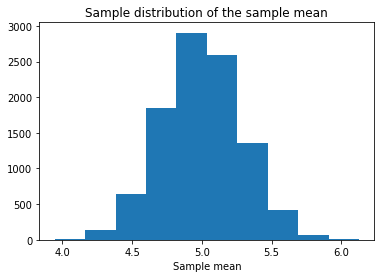

In [303]:
#your code here
#$\bar{X}$ 
norm_rv = stats.norm(5,2)
y = []
for i in range(10000):
    sample = norm_rv.rvs(50)
    #your code here
    mean = np.mean(sample)
    y.append(mean)
    
plt.hist(y)
plt.xlabel('Sample mean')
plt.title('Sample distribution of the sample mean');

print('Sample mean %0.3f, sample variance %0.3f' % (np.mean(sample), np.var(sample)/50))

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Sample mean 4.918, sample variance 0.063


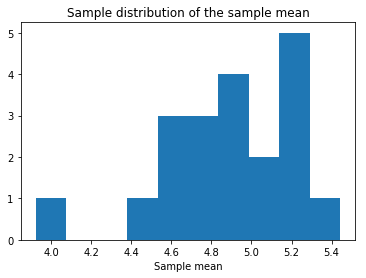

In [304]:
#your code here
#your code here
#$\bar{X}$ 
norm_rv = stats.norm(5,2)
y = []
for i in range(20):
    sample = norm_rv.rvs(50)
    #your code here
    mean = np.mean(sample)
    y.append(mean)
    
plt.hist(y)
plt.xlabel('Sample mean')
plt.title('Sample distribution of the sample mean');

print('Sample mean %0.3f, sample variance %0.3f' % (np.mean(sample), np.var(sample)/50))

- Сделайте z-преобразование для данного распределения

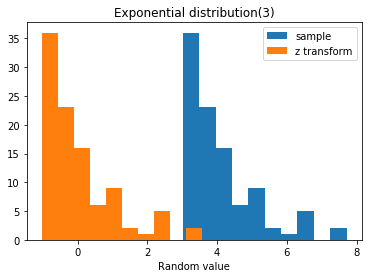

In [330]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(100)

#преобразование заключается в преобразование данных со средним 0 и дисперсией 1. Из каждог наблюдение вычитаем среднее и делим на стандартное отклонение по выборке
new_rv = stats.zscore(sample)
plt.title('Exponential distribution(3)')
plt.hist(sample, label='sample')
plt.hist(new_rv, label='z transform')
plt.xlabel('Random value')
plt.legend(loc='best');

In [379]:
#тоже самое , но вручную. Для демонстрации того, что преобразование делает выборку со средним 0 и дисперсией 1, округляем все значения

expon_rv = stats.expon(3)
sample = expon_rv.rvs(100)
sample = np.round(sample)

In [376]:
mean = np.round(sum([i for i in sample])/len(sample))
std = sqrt(sum([(x - mean)**2 for x in sample])/(len(sample)-1))
new_rv = [(i - mean)/std for i in sample]
print(np.mean(new_rv), np.var(new_rv ))

-0.13046475628145301 0.9729789473684208


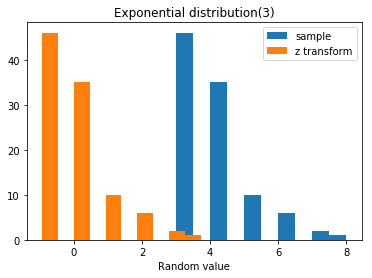

In [377]:
plt.title('Exponential distribution(3)')
plt.hist(sample, label='sample')
plt.hist(new_rv, label='z transform')
plt.xlabel('Random value')
plt.legend(loc='best');

## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [143]:
#your code here
chi2 = stats.chi2(10)

In [144]:
chi2.interval(0.9)

(3.940299136119061, 18.307038053275146)

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [149]:
#your code here
t = stats.t(15)

In [165]:
print('90 interval (%0.3f;%0.3f)' % (t.interval(0.9)))
print('95 interval (%0.3f;%0.3f)' % (t.interval(0.95)))

90 interval (-1.753;1.753)
95 interval (-2.131;2.131)


Можем видеть, что 95% интервал шире

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [156]:
norm_rv = stats.norm(0, 2)
#your code here
n1 = norm_rv.rvs(100)
n2 = norm_rv.rvs(200)

mean1, sigma1 = n1.mean(), n1.std(ddof=1)
mean2, sigma2 = n2.mean(), n2.std(ddof=1)


In [167]:
print('Smaller sample has interval (%0.3f;%0.3f)' % stats.norm.interval(0.9, loc=mean1,scale=sigma1))

Smaller sample has interval (-3.165;3.475)


In [170]:
print('Bigger sample has interval: (%0.3f;%0.3f)' % stats.norm.interval(0.9, loc=mean2,scale=sigma2))

Bigger sample has interval: (-3.078;3.188)


Можем видеть, что на меньшей выборке интервал больше 

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?


Ошибка 1 рода - вероятность отклонить H0, хотя на самом деле она была верна
Ошибка 2 рода - вероятность принять H0, хотя на самом деле она не была верна

В данном случае, мы совершили ошибку 2 рода

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем сильнее получаемые различия.



1. Не верно. p-value показывает вероятность получить такие или еще более выраженные отклонения при условии, что H0 верна
2. Не факт. смотря, какой уровень значимости мы берем
3. Нет. 

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?


Если мы хотим уменьшить ошибку 1 рода, необходимо уменьшить уровень значимости , то есть надо брать 0.01
В общем случае  -  нет, такой интервал хоть и позволит нам практически полностью быть уверенным, что оцениваемая величина лежит в указанном диапазоне, но сам интервал будет достаточно широким и количественно оценить величину будет достаточно трудно.

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

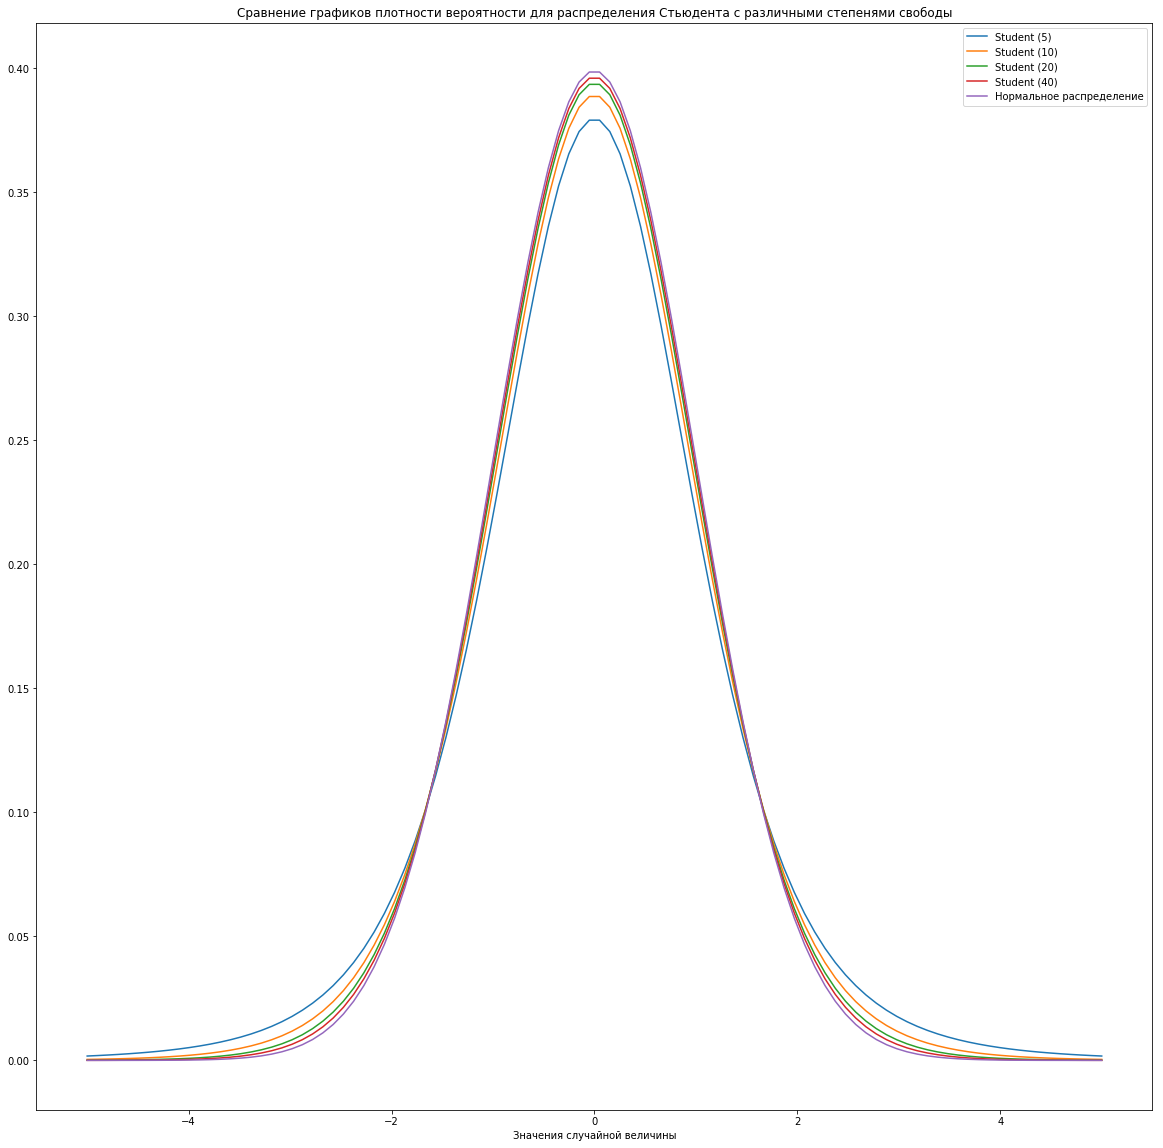

In [276]:
#your code here
x = np.linspace(-5,5,100)
plt.figure(figsize=(20,20))
for n in [5,10,20,40]:
    t = stats.t(n)
    plt.plot(x,t.pdf(x),label = 'Student (%d)' % (n))
plt.plot(x,stats.norm(0,1).pdf(x),label='Нормальное распределение')
plt.xlabel('Значения случайной величины')
plt.title('Сравнение графиков плотности вероятности для распределения Стьюдента с различными степенями свободы')
plt.legend(loc='best');

Можем видеть, что распределение Стьюдента имеет более выраженные 'хвосты' распределения, однако, с увеличением выборки распределение стьюдента приближается к нормальному.

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

-0.9999999999999999


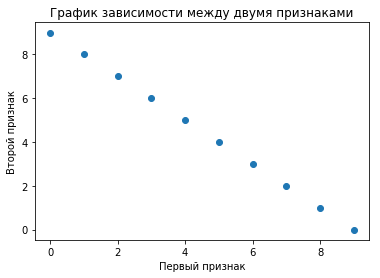

In [204]:
#your code here
x = range(10)
y = x[::-1]
print(np.corrcoef(x,y)[0,1])
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title('График зависимости между двумя признаками')
plt.scatter(x,y);

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

Text(0.5,1,'Демонстрация нулевой корреляции между двумя нормально распределенными случайными велечинами')

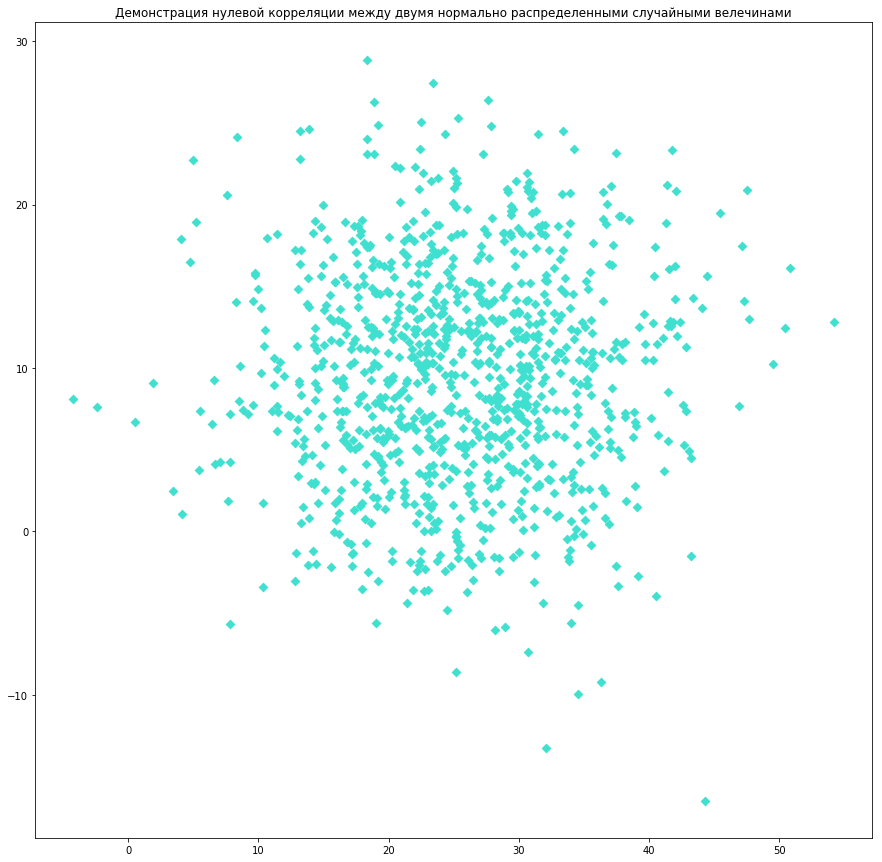

In [234]:
#numpy.random.multivariate_norma Draw random samples from a multivariate normal distribution

#задаем диапазон значений
xx = np.array([0, 50])
yy = np.array([-10, 30])
means = [xx.mean(), yy.mean()]  

#хотим, чтобы 99% измерений лежали в указанном интервале
stds = [xx.std() / 3 , yy.std() / 3 ]

corr = 0       # correlation
#задаем ковариационную матрицу
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 


m = np.random.multivariate_normal(means, covs, 1000).T

plt.figure(figsize=(15,15))
plt.scatter(m[0], m[1], c = 'turquoise', marker = 'D')
plt.title('Демонстрация нулевой корреляции между двумя нормально распределенными случайными велечинами')


Text(0.5,1,'Демонстрация отрицательной корреляции между двумя нормально распределенными случайными велечинами')

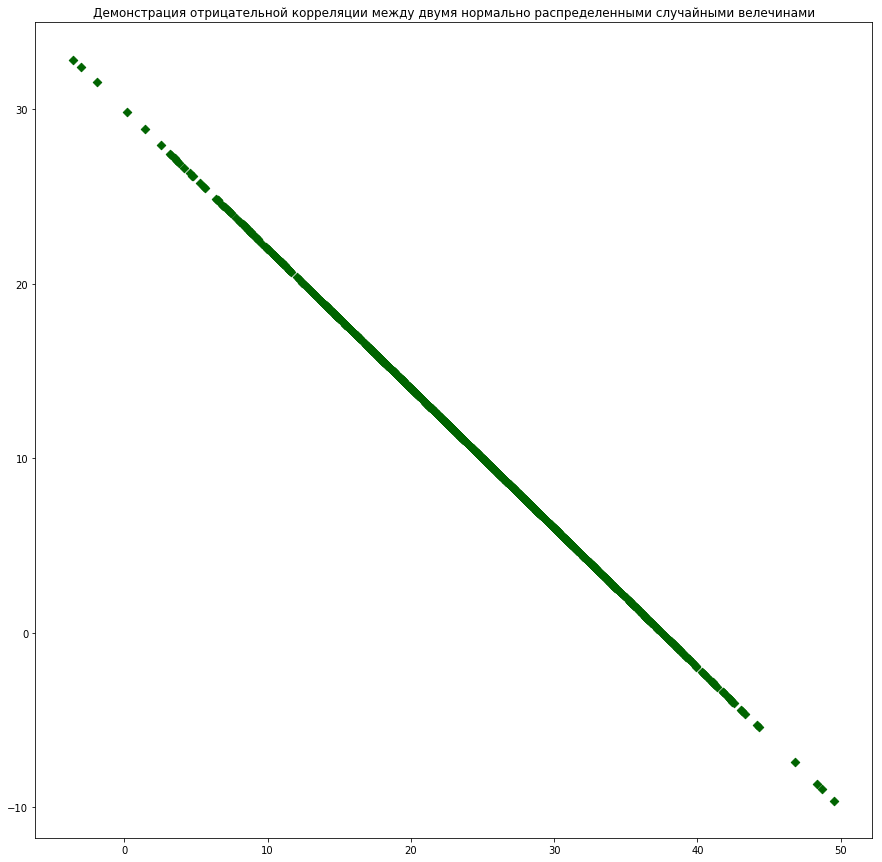

In [232]:
#numpy.random.multivariate_norma Draw random samples from a multivariate normal distribution

#задаем диапазон значений
xx = np.array([0, 50])
yy = np.array([-10, 30])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = -1      # correlation
#задаем ковариационную матрицу
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 


m = np.random.multivariate_normal(means, covs, 1000).T

plt.figure(figsize=(15,15))
plt.scatter(m[0], m[1], c = 'darkgreen', marker = 'D')
plt.title('Демонстрация отрицательной корреляции между двумя нормально распределенными случайными велечинами')

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [275]:
#http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B0%D0%BD%D0%B3
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#общий ранг
sum_total = sum(list(range(1,len(sample))))
#считаем сумму рангов в каждой выборке
sum_x = sum_y = 0
data = list(enumerate(sorted(sample)))
for i in data:
    if i[1] in sample_1:
        sum_x += i[0]
    else:
        sum_y += i[0]
print(sum_x, sum_y, sum_total)

10813 9087 19900
